In [ ]:
#首先生成200个在【-2pi, 2pi】区间内的正弦函数上的点，并且加上一些随机的的噪声， 
#reshape的作用是把Numpy的数组整形成符合scikit-learn输入格式的数组，否则会摆错

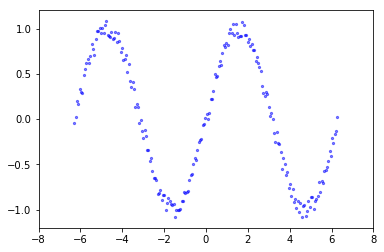

In [3]:
import numpy as np
from matplotlib import pyplot as plt

n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

plt.xlim(-8, 8)
plt.scatter(X, Y, s=5, c='b', alpha=0.5)
plt.show()

In [ ]:
#使用PolynomialFeatures这个多项式特征库和pipline创建一个多项式拟合模型
#这个模型中polynomial_features作为转换器，将训练集添加一些多项式特征。线性回归作为预测器。

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree = 1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    liner_regression = LinearRegression(normalize=True)
    pipline = Pipeline([("polynomial_features", polynomial_features), ("liner_regression", liner_regression)])

    return pipline

In [ ]:
#算出2,3,5,10阶模型拟合评分，均方差（实际的点和模型拟合预测的点之间的距离），均方差越小说明拟合效果越好

In [24]:
from sklearn.metrics import mean_squared_error

degrees = [2, 3, 5, 10]
results = []

for degree in degrees:
    model = polynomial_model(degree=degree)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({"model": model, "degree": degree, "score": train_score, "mse": mse})

for result in results:
    print('degree: {}; train_score: {}; mse: {}'.format( result["degree"], result["score"], result["mse"]))

degree: 2; train_score: 0.14820677080257139; mse: 0.42201734556292714
degree: 3; train_score: 0.27397710594588387; mse: 0.35970496602247154
degree: 5; train_score: 0.9018743580678; mse: 0.048615933445377395
degree: 10; train_score: 0.9937280354384358; mse: 0.003107418261859146


In [ ]:
#从上面结果可以看出，多项式的阶数越高，拟合评分越高，均方差误差越小，拟合效果越好

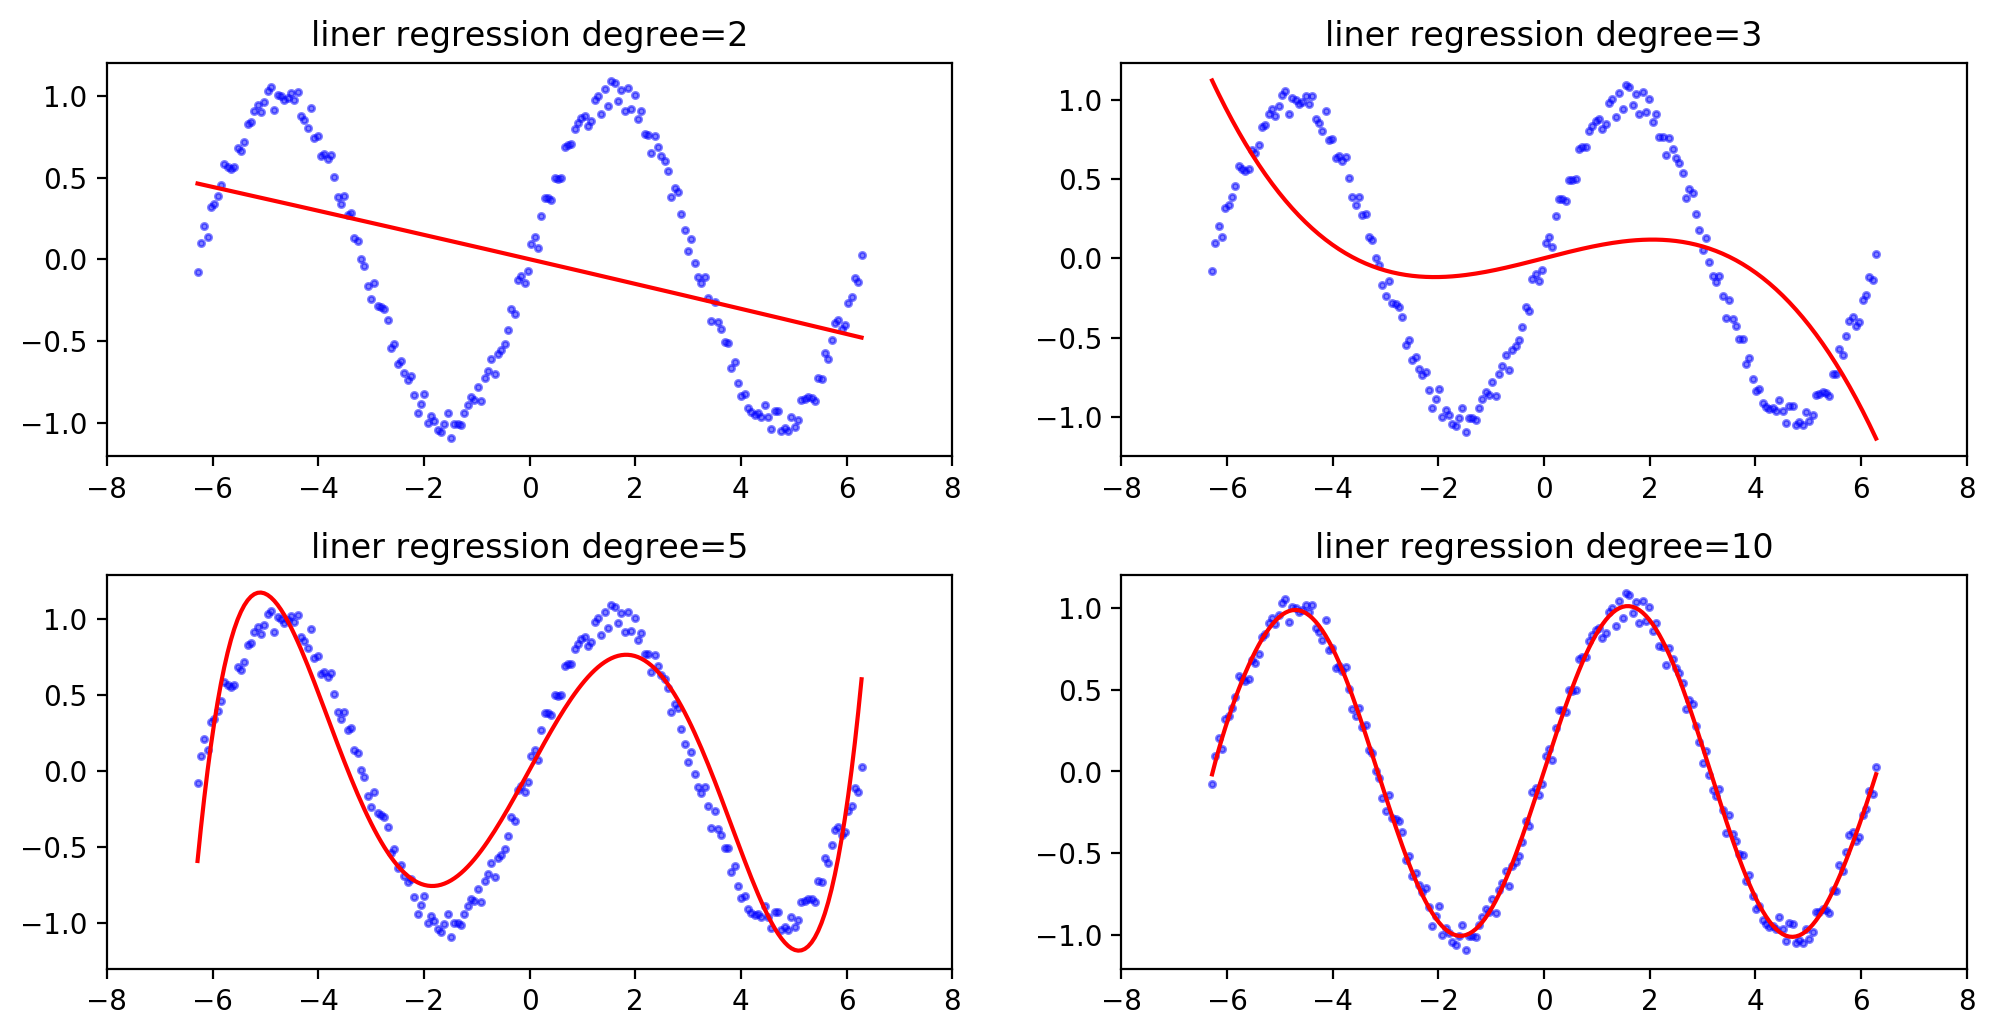

In [21]:
from matplotlib import pyplot as plt
from matplotlib.figure import SubplotParams

plt.figure(figsize = (12, 6), dpi = 200, subplotpars=SubplotParams(hspace=0.3))
for i, result in enumerate(results):
        fig = plt.subplot(2, 2, i + 1)
        plt.xlim(-8, 8)
        plt.title("liner regression degree={}".format(result["degree"]))
        plt.scatter(X, Y, s=5, c='b', alpha=0.5)
        plt.plot(X, result["model"].predict(X), 'r-')
plt.show()